In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import pytesseract
%matplotlib inline
from PIL import Image
from pytesseract import Output


### Pytesseract installation
   Check [ths link](https://pypi.org/project/pytesseract/)
    

In [2]:
text = cv2.imread('../data/test1.jpg')
text_rgb = cv2.cvtColor(text, cv2.COLOR_BGR2RGB)


In [3]:
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
d = pytesseract.image_to_data(text_rgb,output_type=Output.DICT)

In [4]:
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [5]:
plt.clf()
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        text_rgb = cv2.rectangle(text_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

<Figure size 432x288 with 0 Axes>

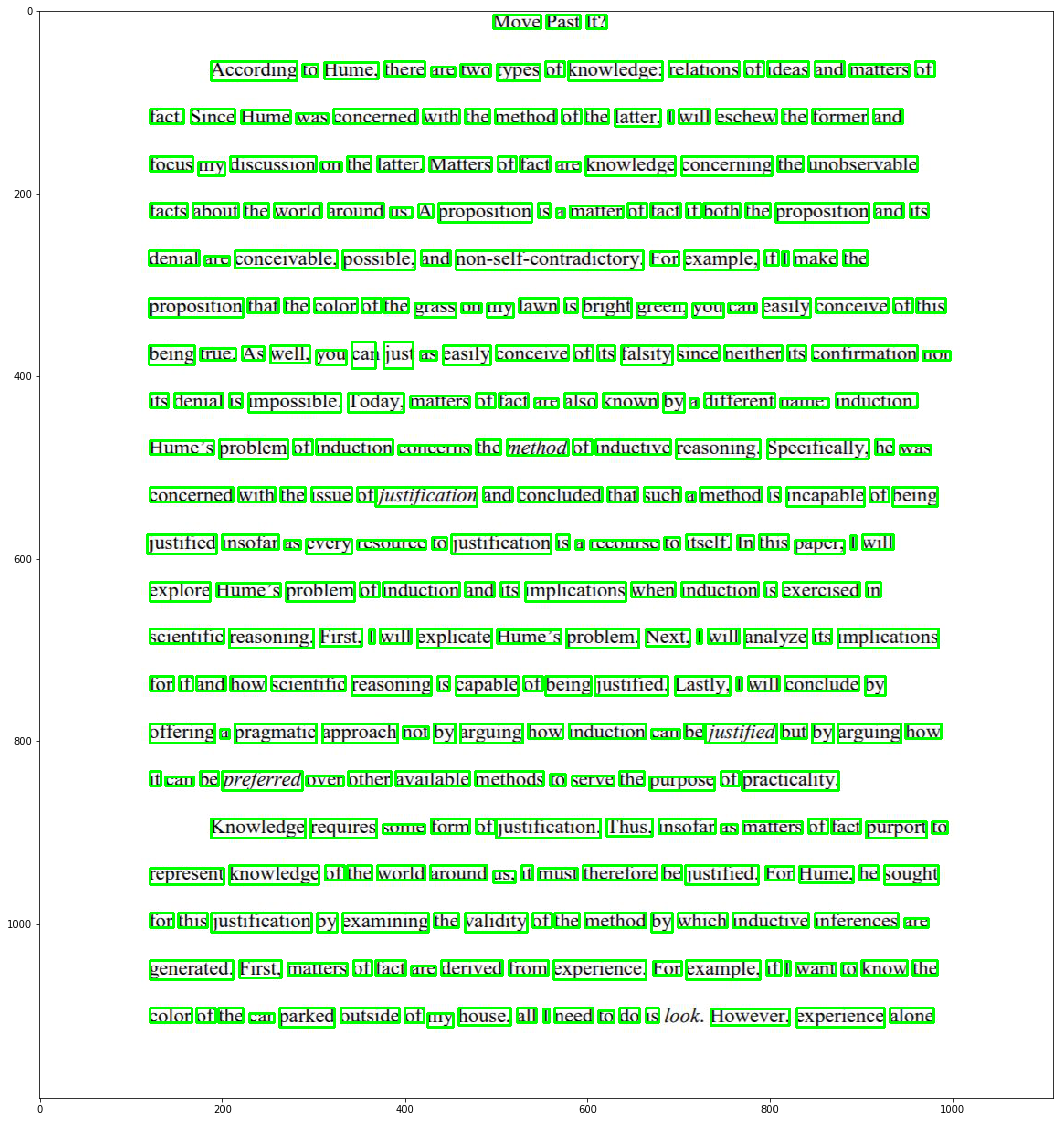

In [6]:
plt.figure(figsize=(40,20))
plt.imshow(text_rgb)


In [7]:
print(d['word_num'])

[0, 0, 0, 0, 1, 2, 3, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 0, 1, 2, 3, 4, 5, 6, 7

In [8]:
line_1 = range(7,16)
average_distance_per_line = np.zeros(len(line_1)-1)
j = 0
for i in line_1 :
    if int(d['conf'][i]) > 60 :
        (x, w) = (d['left'][i], d['width'][i])
        x2 = d['left'][i+1]
        average_distance_per_line[j] = x2 - w - x
        j += 1
        
print(average_distance_per_line)
print("average interword space in the first line is", np.mean(average_distance_per_line))

[6. 7. 7. 7. 6. 7. 6. 0.]
average interword space in the first line is 5.75


We want to suppress all values having a confidence less than 60% to make the computation easier

In [43]:
i=0
j=0
while i < len(d['conf']):
    if int(d['conf'][i]) <= 60 :
        d['level'].pop(i)
        d['page_num'].pop(i)
        d['block_num'].pop(i)
        d['par_num'].pop(i)
        d['line_num'].pop(i) 
        d['word_num'].pop(i)
        d['left'].pop(i)
        d['top'].pop(i)
        d['width'].pop(i)
        d['height'].pop(i)
        d['conf'].pop(i)
        d['text'].pop(i)
        j += 1
        i -= 1
    i += 1
        


In [44]:
print(d['word_num'])

[1, 2, 3, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1

In [19]:
words_per_line = []
l = -1
for num in d['word_num'] :
    if num == 1 :
        words_per_line.append(1)
        l += 1
    else :
        words_per_line[l] += 1
        

In [20]:
print(words_per_line)

[3, 15, 17, 14, 19, 12, 19, 18, 16, 13, 16, 17, 13, 14, 16, 16, 14, 14, 16, 15, 17, 18]


### Interword distance

In [59]:
def interword_distances_line_i(i) :
    if (i >=len(words_per_line)) :
        print("This line does not exist")
        return -1
    
    if words_per_line[i] <2 :
        print("Not enough words")
        return -1
    n = words_per_line[i]
    dist = np.zeros(n-1)
    start = int(np.sum(words_per_line[:i]))
    for i in range(n-1) :
        index = start+i
        (x, w) = (d['left'][index], d['width'][index])
        x2 = d['left'][index+1]
        dist[i] = x2 - x - w
    return dist

In [60]:
interword_distances_line_i(14)

array([6., 4., 5., 6., 7., 7., 7., 6., 3., 4., 8., 7., 7., 6., 7.])

Not completely optimized 

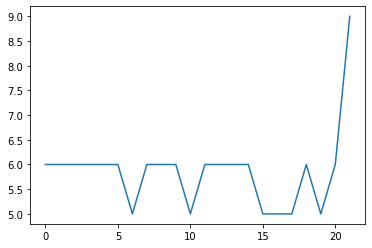

In [112]:
average_line = [int(np.mean(interword_distances_line_i(i))) for i in range(len(words_per_line))]
plt.plot(average_line)


With data = test1.jpg , there is a error on the last line while looking for the boxes, the word "look" was not found.

### Distance between lines

In [105]:
def line_position(i) :
    n = words_per_line[i]
    pos = np.zeros(n)
    start = int(np.sum(words_per_line[:i]))
    for i in range(n) :
        index = start+i
        (y, h) = (d['top'][index], d['height'][index])
        pos[i] = y
        #pos[i] = (y+h)/2
    return np.mean(pos)
    

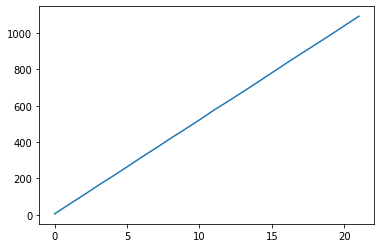

In [107]:
n = len(words_per_line)
pos_line = np.zeros(n)
for i in range(n) :
    pos_line[i] = line_position(i)
    
plt.plot(pos_line)